In [1]:
import numpy as np
import matplotlib as plt


In [2]:
def func(y,t,n,w,x, beta, Y):
    dydt = []

    for i in range (n):
        w_x = y[i]
        temp = w[i]*x[i] - w_x
        dydt.append(temp)
    p = y[n]
    sum = 0
    for i in range (n):
        sum += y[i]
    temp = sum + beta -p
    dydt.append(temp)  

    q = y[n+1]
    temp = p*Y - q
    dydt.append(temp)

    o1 = y[n+2]
    o2 = y[n+3]
    o3 = y[n+4]

    temp = o3 - o2
    dydt.append(temp)

    temp = o1 - o3
    dydt.append(temp)

    temp = o2 - o1
    dydt.append(temp)
    
    return dydt
    

In [3]:
t = np.linspace(0, 100, 101)

# hardcoding the oscillating species
o1 = 0
o2 = 1
o3 = 1

p0 = 0
q0 = 0
y0 = [0, 0, 0, 0, 0, p0, q0, o1, o2, o3]

w = [1, 6, 7, 10, 5]
x = [1, 2 ,3, 4, 5]

n= len(w)

Y = 4
beta = 100



In [4]:
from scipy.integrate import odeint
sol = odeint(func, y0, t, args=(n,w,x, beta, Y))

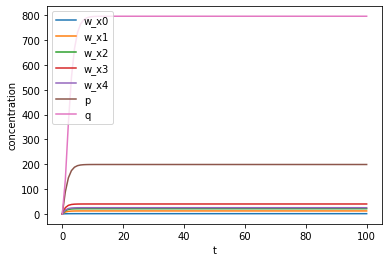

In [5]:
import matplotlib.pyplot as plt
for i in range (n):
    plt.plot(t, sol[:,i], label='w_x'+str(i))
plt.plot(t, sol[:,n], label='p')
plt.plot(t, sol[:,n+1], label='q')
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend()
plt.show()

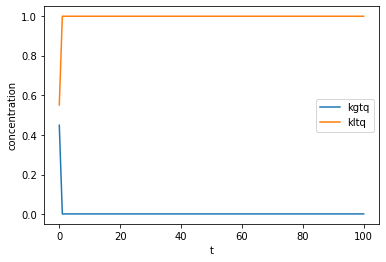

0.0012547051442910928
0.998745294855709


In [6]:
Q = sol[:,n+1]
# last element of Q is the final value of q
q = Q[-1]
k = 1
# generate a random number between 0 and 1
r = np.random.rand()
kgtq =r
kltq = 1-r 

def comparisonode(y, t, q, k):
    dydt = []
    kgtq = y[0]
    kltq = y[1]

    temp = k*kltq - kgtq*q
    dydt.append(temp)

    temp = kgtq*q - k*kltq
    dydt.append(temp)

    return dydt

y0 = [kgtq, kltq]
t = np.linspace(0, 100, 101)
sol = odeint(comparisonode, y0, t, args=(q,k))

plt.plot(t, sol[:,0], label='kgtq')
plt.plot(t, sol[:,1], label='kltq')
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend()
plt.show()

print(sol[:,0][-1])
print(sol[:,1][-1])


In [7]:
def Approx_majority (y, t):
    kgtq = y[0]
    kltq = y[1]
    b = y[2]

    dydt = []
    
    temp =  - kgtq*kltq + kgtq *b
    dydt.append(temp)

    temp = kltq*b - kgtq*kltq
    dydt.append(temp)

    temp = 2* kgtq*kltq - kgtq*b - kltq*b 
    dydt.append(temp)

    return dydt

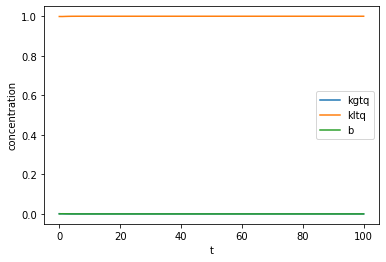

-1.42200784314717e-15
1.0000000000000566
-5.6372673860707556e-14


In [8]:
y0 = [sol[:,0][-1], sol[:,1][-1], 0]
t = np.linspace(0, 100, 101)
sol = odeint(Approx_majority, y0, t)

plt.plot(t, sol[:,0], label='kgtq')
plt.plot(t, sol[:,1], label='kltq')
plt.plot(t, sol[:,2], label='b')
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend()
plt.show()

print(sol[:,0][-1])
print(sol[:,1][-1])
print(sol[:,2][-1])

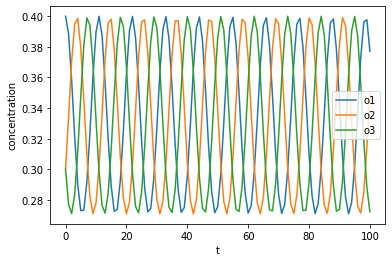

In [24]:
# side note
# oscillating species reaction network
# o1 -> o2 
# o2 -> o3
# o3 -> o1

def oscillating_species(y,t, da, db, dc):
    dydt = []
    o1 = y[0]
    o2 = y[1]
    o3 = y[2]

    temp1 = (o3 - o2)*o1 + da*o3 -db*o1
    dydt.append(temp1)

    temp2 = (o1 - o3)*o2 + db*o1 - dc*o2
    dydt.append(temp2)

    temp3 = (o2 - o1)*o3 + dc*o2 - da*o3
    dydt.append(temp3)

    # temp = (o3 - o2)*o1 
    # dydt.append(temp)

    # temp = (o1 - o3)*o2 
    # dydt.append(temp)

    # temp = (o2 - o1)*o3 
    # dydt.append(temp)
    
    return dydt

t = np.linspace(0, 100, 101)
a =0.4
b= 0.3
c = 0.3
y0 = [a, b, c]
power = -10

da = 10 ** power
db =da
dc =da
sol = odeint(oscillating_species, y0, t, args=(da,db,dc))
plt.plot(t, sol[:,0], label='o1')
plt.plot(t, sol[:,1], label='o2')
plt.plot(t, sol[:,2], label='o3')
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend()
plt.show()




